# Clustering Analysis of Hearthstone Cards - PCA
This section uses Principal Component Analysis (PCA) to attempt to visualize where each card is relative to the rest of the cards.

----

## Introduction
In this case, PCA decomposes a multi-dimensinoal matrix of cards' features into a predefined number of arbitary axes. These arbitary axes are the directions of vectors that explain the largest variance among the samples.

----

### Importing packages

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Loading data
The processed data has already been generated and saved in the notebook `hs-package-kmeans.ipynb`. Reading the CSV file `cards-decks.csv`

In [13]:
# reading the csv file, using the first column as index
cards_features = pd.read_csv("./cards-decks.csv", index_col=0)
cards_features.head()

,137,1690,2414,3527,3992,4592,4965,5269,5327,5358,...,325935,325937,326209,330402,331034,334031,335601,336843,345826,346203
name,,,,,,,,,,,,,,,,,,,,,
Oasis Snapjaw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Shadow Word: Death,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Silent Knight,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Unlicensed Apothecary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Shadow Madness,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# saving the dataframe as numpy array
cards_features_array = np.array(cards_features)

## Performing PCA (2 dimensions)
Reducing the dimensions of the data from 1296 dimensions to 2 most important arbitary dimensions.

In [25]:
pca = PCA(n_components=2)
cards_features_array_pca = pca.fit_transform(cards_features_array)

print("Variance explained by the top 2 axes: %0.3f, %0.3f" % tuple(pca.explained_variance_ratio_))

Variance explained by the top 2 axes: 0.071, 0.054


The two axes calcualted by PCA are able to explain 7.1% andd 5.4% of the variace.

In [32]:
cards_features_array_pca_df = pd.DataFrame(cards_features_array_pca, columns = ['component 1', 'component 2'], index=cards_features.index)
cards_features_array_pca_df.head()

,component 1,component 2
name,,
Oasis Snapjaw,-0.874301,-0.594297
Shadow Word: Death,0.549879,2.103244
Silent Knight,-0.652878,-0.541117
Unlicensed Apothecary,-0.829450,-0.517632
Shadow Madness,-0.797094,-0.321548


## Performing TSNE (2 dimensions)
Using TSNE to reduce the dimension of the dataset to 2 dimensions.

In [42]:
cards_features_array_tsne = TSNE(n_components=2).fit_transform(cards_features_array)

## Plotting the PCA data

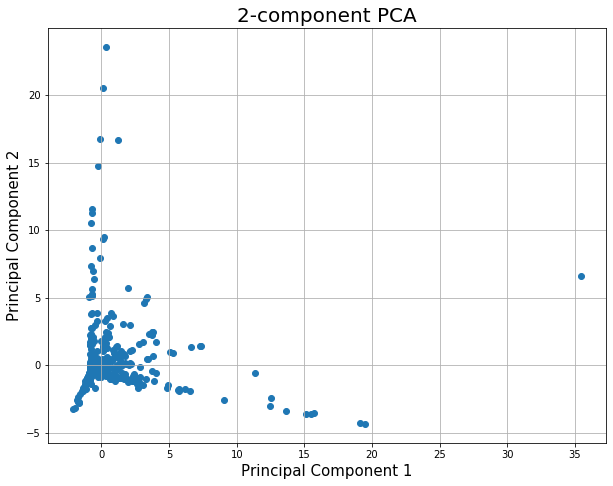

In [40]:
# plotting a simple scatterplot without and color partitining.
ax = plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2-component PCA', fontsize=20)
ax.scatter(cards_features_array_pca_df['component 1'], cards_features_array_pca_df['component 2'])
ax.grid()
ax.set(aspect='equal');